In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn import metrics, datasets, preprocessing, model_selection, svm, naive_bayes, neighbors, ensemble
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, roc_auc_score, roc_curve, plot_roc_curve
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
!pip install xgboost
from xgboost import XGBClassifier
import xgboost as xgb

In [2]:
##The data set of an international bank was obtained from Kaggle  
##https://www.kaggle.com/nasirislamsujan/bank-customer-churn-prediction
file='C:/Users/EN/DataScienceAcademy/Project1/Project_EDA/Churn.csv'
df=pd.read_csv(file)

In [3]:
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [4]:
df.loc[(df['Exited'] == 0), 'Churn'] = 'Non-Churn'
df.loc[(df['Exited'] == 1), 'Churn'] = 'Churn'

In [5]:
df.drop(["Exited"], axis=1, inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Churn
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Non-Churn
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Churn
3,699,France,Female,39,1,0.00,2,0,0,93826.63,Non-Churn
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Non-Churn


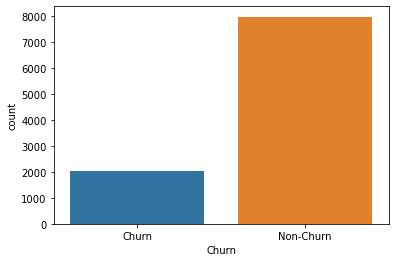

In [7]:
sns.countplot(x='Churn', data=df)

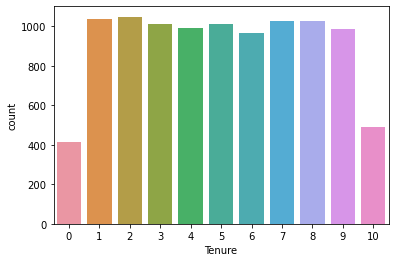

In [52]:
sns.countplot(x='Tenure', data=df)

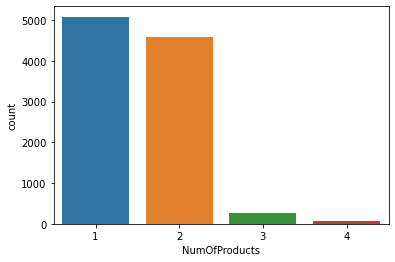

In [53]:
sns.countplot(x='NumOfProducts', data=df)

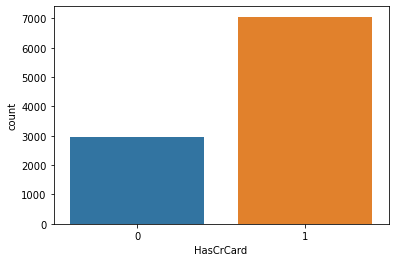

In [54]:
sns.countplot(x='HasCrCard', data=df)

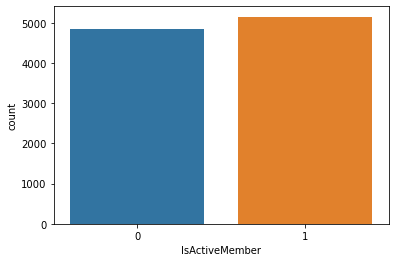

In [55]:
sns.countplot(x='IsActiveMember', data=df)

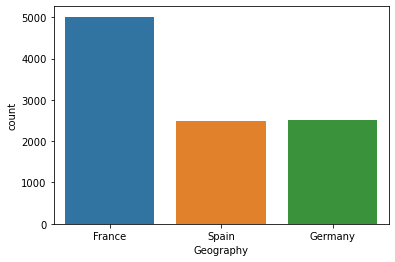

In [56]:
sns.countplot(x='Geography', data=df)

In [8]:
label_encoder = preprocessing.LabelEncoder() #label encoding on class_label before logistic regression
df['Churn']= label_encoder.fit_transform(df['Churn']) 
df['Churn'].unique()
df['Gender']= label_encoder.fit_transform(df['Gender']) 
df['Gender'].unique()
df['Geography']= label_encoder.fit_transform(df['Geography']) 
df['Geography'].unique()
df['NumOfProducts']= label_encoder.fit_transform(df['NumOfProducts']) 
df['NumOfProducts'].unique()
df['IsActiveMember']= label_encoder.fit_transform(df['IsActiveMember']) 
df['IsActiveMember'].unique()
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,0,0,42,2,0.00,0,1,1,101348.88,0
1,608,2,0,41,1,83807.86,0,0,1,112542.58,1
2,502,0,0,42,8,159660.80,2,1,0,113931.57,0
3,699,0,0,39,1,0.00,1,0,0,93826.63,1
4,850,2,0,43,2,125510.82,0,1,1,79084.10,1


In [9]:
X = df.loc[:,['CreditScore', 'Geography', 'Gender', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Age']]
y = df['Churn']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [12]:
#Logistic regression classifier
LR = LogisticRegression(solver= 'liblinear', fit_intercept = True)
results_LR = LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Train accuracy:', LR.score(X_train, y_train))
print('Test accuracy:', LR.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred), 
                                                                recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
CV_scores_LR = cross_val_score(LR,  X, y, cv=10)
print('CV Accuracy', statistics.mean(CV_scores_LR))

Train accuracy: 0.784
Test accuracy: 0.8006666666666666
Precision:0.8156,   Recall:0.9723, F1:0.8871
CV Accuracy 0.7902


In [15]:
SVC = svm.SVC(kernel="rbf")
results_SVC = SVM.fit(X_train, y_train)
y_pred_SVC = SVM.predict(X_test)
print('Train accuracy:', SVM.score(X_train, y_train))
print('Test accuracy:', SVM.score(X_test, y_test))
print('Precision:{:6.4f}, Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_SVM), 
                                                                recall_score(y_test, y_pred_SVM), f1_score(y_test, y_pred_SVM)))
CV_scores_SVC = cross_val_score(SVC,  X, y, cv=10)
print('CV Accuracy', statistics.mean(CV_scores_SVC))

Train accuracy: 0.7924285714285715
Test accuracy: 0.8053333333333333
Precision:0.8053, Recall:1.0000, F1:0.8922
CV Accuracy 0.7963


In [16]:
#Gradient Boosting Classifier
GB = GradientBoostingClassifier()
results_GB = GB.fit(X_train, y_train)
y_pred_GB = GB.predict(X_test)
print('Train accuracy:', GB.score(X_train, y_train))
print('Test accuracy:', GB.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_GB), 
                                                                recall_score(y_test, y_pred_GB), f1_score(y_test, y_pred_GB)))
CV_scores_GB = cross_val_score(GB,  X, y, cv=10)
print('CV Accuracy', statistics.mean(CV_scores_GB))

Train accuracy: 0.87
Test accuracy: 0.87
Precision:0.8811,   Recall:0.9694, F1:0.9231
CV Accuracy 0.8638


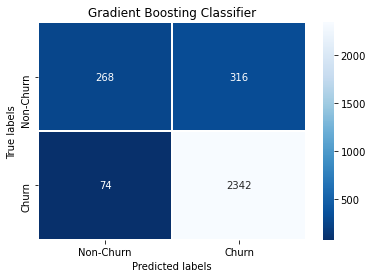

In [17]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_GB)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(['Non-Churn', 'Churn'])
ax.yaxis.set_ticklabels(['Non-Churn', 'Churn']);

In [18]:
#Bagging Desicion Tree Classification
kfold = model_selection.KFold(n_splits=10, random_state=7)
cart = DecisionTreeClassifier()
BG = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=7)
results_BG = model_selection.cross_val_score(BG, X_train, y_train, cv=kfold)
BG.fit(X_train, y_train)
y_pred_BG = BG.predict(X_test)
print('Train accuracy:', BG.score(X_train, y_train))
print('Test accuracy:', BG.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_BG), 
                                                                recall_score(y_test, y_pred_BG), f1_score(y_test, y_pred_BG)))
CV_scores_BG = cross_val_score(BG,  X, y, cv=10)
print('CV Accuracy', statistics.mean(CV_scores_BG))

C:\Users\EN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Train accuracy: 1.0
Test accuracy: 0.859
Precision:0.8802,   Recall:0.9549, F1:0.9160
CV Accuracy 0.8543999999999999


In [19]:
# Random Forest Classification
kfold = model_selection.KFold(n_splits=10, random_state=7)
RF = RandomForestClassifier(n_estimators=100, max_features=3)
results_RF = model_selection.cross_val_score(RF, X_train, y_train, cv=kfold)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
print('Train accuracy:', RF.score(X_train, y_train))
print('Test accuracy:', RF.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_RF), 
                                                                recall_score(y_test, y_pred_RF), f1_score(y_test, y_pred_RF)))
CV_scores_RF = cross_val_score(RF,  X, y, cv=10)
print('CV Accuracy', statistics.mean(CV_scores_RF))

C:\Users\EN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Train accuracy: 0.9998571428571429
Test accuracy: 0.8653333333333333
Precision:0.8811,   Recall:0.9627, F1:0.9201
CV Accuracy 0.8602


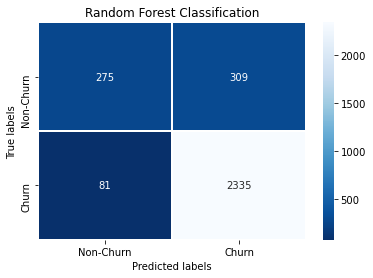

In [21]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_RF)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest Classification')
ax.xaxis.set_ticklabels(['Non-Churn', 'Churn'])
ax.yaxis.set_ticklabels(['Non-Churn', 'Churn']);

In [20]:
# Extra Trees Classification
kfold = model_selection.KFold(n_splits=10, random_state=7)
ET = ExtraTreesClassifier(n_estimators=100, max_features=3)
results_ET = model_selection.cross_val_score(ET, X_train, y_train, cv=kfold)
ET.fit(X_train, y_train)
y_pred_ET = ET.predict(X_test)
print('Train accuracy:', ET.score(X_train, y_train))
print('Test accuracy:', ET.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_ET), 
                                                                recall_score(y_test, y_pred_ET), f1_score(y_test, y_pred_ET)))
CV_scores_ET = cross_val_score(ET, X, y, cv=10)
print('CV Accuracy', statistics.mean(CV_scores_ET))

C:\Users\EN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Train accuracy: 1.0
Test accuracy: 0.864
Precision:0.8803,   Recall:0.9619, F1:0.9193
CV Accuracy 0.8567


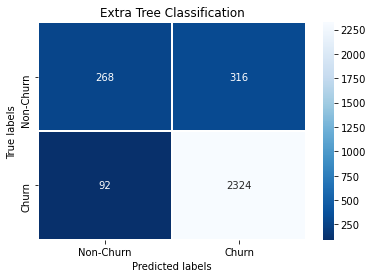

In [21]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_ET)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Extra Tree Classification')
ax.xaxis.set_ticklabels(['Non-Churn', 'Churn'])
ax.yaxis.set_ticklabels(['Non-Churn', 'Churn']);

In [22]:
# AdaBoost Classification
kfold = model_selection.KFold(n_splits=10, random_state=7)
Ada = AdaBoostClassifier(n_estimators=100, random_state=7)
results_Ada = model_selection.cross_val_score(Ada, X_train, y_train, cv=kfold)
Ada.fit(X_train, y_train)
y_pred_Ada = Ada.predict(X_test)
print('Train accuracy:', Ada.score(X_train, y_train))
print('Test accuracy:', Ada.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_Ada), 
                                                                recall_score(y_test, y_pred_Ada), f1_score(y_test, y_pred_Ada)))
CV_scores_Ada = cross_val_score(Ada,  X, y, cv=10)
print('CV Accuracy', statistics.mean(CV_scores_Ada))

C:\Users\EN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Train accuracy: 0.8604285714285714
Test accuracy: 0.863
Precision:0.8834,   Recall:0.9561, F1:0.9183
CV Accuracy 0.8566


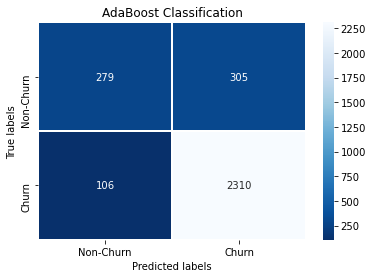

In [23]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_Ada)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('AdaBoost Classification')
ax.xaxis.set_ticklabels(['Non-Churn', 'Churn'])
ax.yaxis.set_ticklabels(['Non-Churn', 'Churn']);

In [24]:
#Stochastic Gradient Boosting
kfold = model_selection.KFold(n_splits=10, random_state=7)
SGB = GradientBoostingClassifier(n_estimators=100, random_state=7)
results_SGB = model_selection.cross_val_score(SGB, X_train, y_train, cv=kfold)
SGB.fit(X_train, y_train)
y_pred_SGB = SGB.predict(X_test)
print('Train accuracy:', SGB.score(X_train, y_train))
print('Test accuracy:', SGB.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_SGB), 
                                                                recall_score(y_test, y_pred_SGB), f1_score(y_test, y_pred_SGB)))
CV_scores_SGB = cross_val_score(SGB,  X, y, cv=10)
print('CV Accuracy', statistics.mean(CV_scores_SGB))

C:\Users\EN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Train accuracy: 0.87
Test accuracy: 0.87
Precision:0.8811,   Recall:0.9694, F1:0.9231
CV Accuracy 0.8638


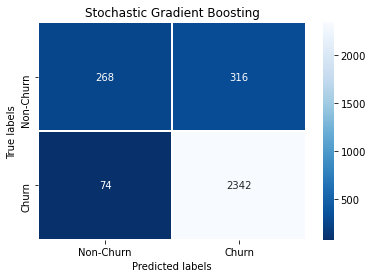

In [25]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_SGB)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Stochastic Gradient Boosting')
ax.xaxis.set_ticklabels(['Non-Churn', 'Churn'])
ax.yaxis.set_ticklabels(['Non-Churn', 'Churn']);

In [26]:
# Voting Ensemble for Classification
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
kfold = model_selection.KFold(n_splits=10, random_state=7)
VC = VotingClassifier(estimators)
results_VC = model_selection.cross_val_score(VC, X_train, y_train, cv=kfold)
VC.fit(X_train, y_train)
y_pred_VC = VC.predict(X_test)
print('Train accuracy:', VC.score(X_train, y_train))
print('Test accuracy:', VC.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_VC), 
                                                                recall_score(y_test, y_pred_VC), f1_score(y_test, y_pred_VC)))
CV_scores_VC = cross_val_score(VC,  X, y, cv=10)
print('CV Accuracy', statistics.mean(CV_scores_VC))

C:\Users\EN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Train accuracy: 0.9802857142857143
Test accuracy: 0.7873333333333333
Precision:0.8825,   Recall:0.8489, F1:0.8654
CV Accuracy 0.7845


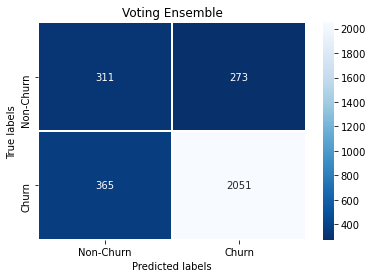

In [27]:
cm = confusion_matrix(y_test, y_pred_VC)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Voting Ensemble')
ax.xaxis.set_ticklabels(['Non-Churn', 'Churn'])
ax.yaxis.set_ticklabels(['Non-Churn', 'Churn']);

In [28]:
XGB=xgb.XGBClassifier(random_state=7,learning_rate=0.01)
XGB.fit(X_train, y_train)
XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)
print('Train accuracy:', XGB.score(X_train, y_train))
print('Test accuracy:', XGB.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_XGB), 
                                                                recall_score(y_test, y_pred_XGB), f1_score(y_test, y_pred_XGB)))
CV_scores_XGB = cross_val_score(XGB,  X, y, cv=10)
print('CV Accuracy', statistics.mean(CV_scores_XGB))

Train accuracy: 0.8608571428571429
Test accuracy: 0.8636666666666667
Precision:0.8696,   Recall:0.9772, F1:0.9203
CV Accuracy 0.8553999999999999


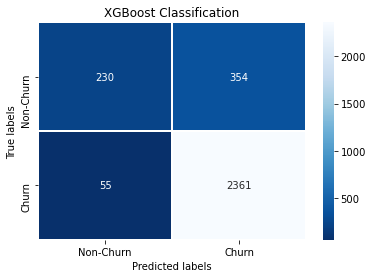

In [29]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_XGB)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('XGBoost Classification')
ax.xaxis.set_ticklabels(['Non-Churn', 'Churn'])
ax.yaxis.set_ticklabels(['Non-Churn', 'Churn']);

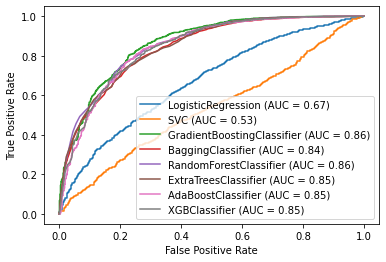

In [32]:
classifiers = [LR, SVM, GB, BG, RF, ET, Ada, XGB]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

In [38]:
data = [['GB', statistics.mean(CV_scores_GB),f1_score(y_test, y_pred_GB) ],['BG', statistics.mean(CV_scores_BG), f1_score(y_test, y_pred_BG)], 
        ['RF', statistics.mean(CV_scores_RF), f1_score(y_test, y_pred_RF)],['ET', statistics.mean(CV_scores_ET), f1_score(y_test, y_pred_ET)], 
        ['Ada', statistics.mean(CV_scores_Ada), f1_score(y_test, y_pred_Ada)], ['XGB', statistics.mean(CV_scores_XGB), f1_score(y_test, y_pred_XGB)]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Model', 'CV_Accuracy', 'F1']) 

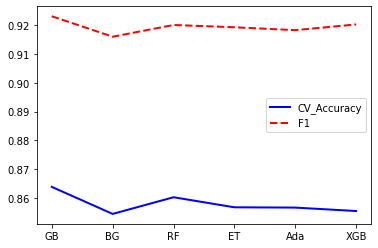

In [39]:
plt.plot( 'Model', 'CV_Accuracy', data=df, marker='', color='blue', linewidth=2)
plt.plot( 'Model', 'F1', data=df, marker='', color='red', linewidth=2, linestyle='dashed', label="F1")
plt.legend()